## Output variable -> y
## y -> Whether the client has subscribed a term deposit or not 
## Binomial ("yes" or "no")


#### Importing necessary libraries

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#### Load the dataset

In [2]:
bank = pd.read_csv('bank_full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

#### Dropping the unnecessary columns

In [6]:
bank.drop(['job','age','marital','education','balance','contact','day','month','duration','poutcome'], inplace = True, axis=1)

#### Changing string values to numeric values

In [10]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [11]:
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})

In [12]:
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})

In [13]:
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})

In [14]:
bank.head()

,default,housing,loan,campaign,pdays,previous,y
0,0,1,0,1,-1,0,0
1,0,1,0,1,-1,0,0
2,0,1,1,1,-1,0,0
3,0,1,0,1,-1,0,0
4,0,0,0,1,-1,0,0


#### Visualizing the data

<AxesSubplot:xlabel='y', ylabel='count'>

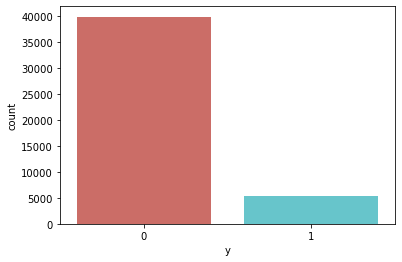

In [17]:
sns.countplot(x='y',data=bank, palette='hls')

<AxesSubplot:xlabel='loan', ylabel='count'>

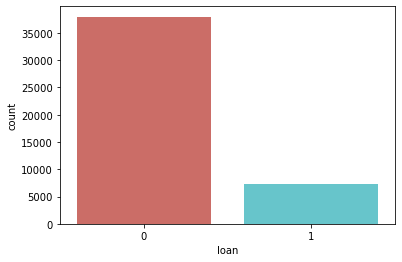

In [21]:
sns.countplot(x='loan',data=bank, palette='hls')

<AxesSubplot:xlabel='housing', ylabel='count'>

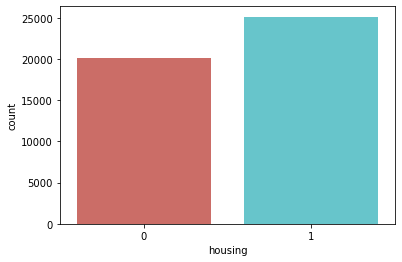

In [22]:
sns.countplot(x='housing',data=bank, palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

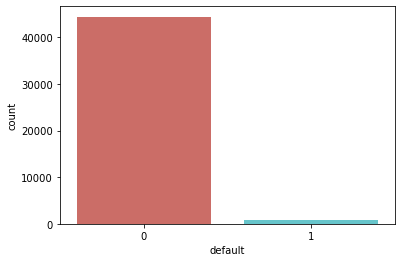

In [23]:
sns.countplot(x='default',data=bank, palette='hls')

In [24]:
bank.sum()

default         815
housing       25130
loan           7244
campaign     124956
pdays       1817384
previous      26237
y              5289
dtype: int64

#### Shape and null values 

In [25]:
bank.shape

(45211, 7)

In [27]:
bank.isnull().sum()

default     0
housing     0
loan        0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

#### Dividing our data into input and output variables

In [29]:
X = bank.iloc[:,1:] ### Excluding zeroth column, every other columns is in X 
Y = bank.iloc[:,0] ### Zeroth column is in Y 

#### logistic regression and fit the model

In [30]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

#### Predict for X data

In [31]:
Y_pred = classifier.predict(X)

In [32]:
Y_pred_df = pd.DataFrame({'actual' : Y, 'Predicted_prob' : classifier.predict(X) })

In [33]:
Y_pred_df

,actual,Predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


#### Confusion Matrix for the model accuracy

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Y_pred)
print(cm)

[[44396     0]
 [  815     0]]


In [35]:
# Checking  Accuracy
((44396 + 0) / (44396 + 0 + 815 + 0))*100

98.19734135497998

#### Classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44396
           1       0.00      0.00      0.00       815

    accuracy                           0.98     45211
   macro avg       0.49      0.50      0.50     45211
weighted avg       0.96      0.98      0.97     45211



C:\Users\D_R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC Curve

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

In [40]:
auc = roc_auc_score(Y,Y_pred)
print(auc)

0.5


Text(0, 0.5, 'true positive rate')

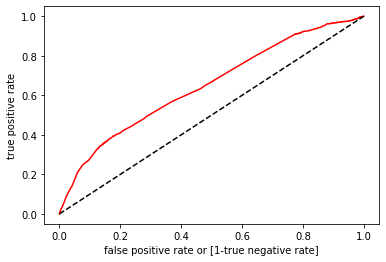

In [41]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red',label='Logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1-true negative rate]')
plt.ylabel('true positive rate')

In [42]:
fpr

array([0.00000000e+00, 2.25245518e-05, 1.35147311e-04, ...,
       9.98423281e-01, 9.98468330e-01, 1.00000000e+00])

In [43]:
thresholds

array([1.11581601e+00, 1.15816008e-01, 8.90174636e-02, ...,
       2.40230546e-03, 2.39651432e-03, 7.09392077e-08])